In [16]:
import pandas as pd

In [17]:
df = pd.read_csv('covid_19_country_wise_latest.csv')

In [18]:
print(df.head())

   Unnamed: 0 Country/Region  Confirmed Deaths  Recovered  Active  New cases  \
0           0    Afghanistan      36263   1269      25198    9796      106.0   
1           1        Albania       4880    144       2745    1991      117.0   
2           2        Algeria      27973   1163      18837    7973      616.0   
3           3        Andorra        907     52        803      52       10.0   
4           4         Angola        950     41        242     667       18.0   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0        10.0             18                3.50                  69.49   
1         6.0             63                2.95                  56.25   
2         8.0            749                4.16                  67.34   
3         0.0              0                5.73                  88.53   
4         1.0              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0  

# 2

In [19]:
df.set_index('Unnamed: 0', inplace=True)

# 3

In [20]:
df.index.name = "index"


# 4

In [21]:
def clean_column_names(df):
    df.columns = df.columns.str.replace(" ", "_")
    return df

df = clean_column_names(df)

print(df.head())


      Country/Region  Confirmed Deaths  Recovered  Active  New_cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New_deaths  New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73                  88.53   
4             1.0    

# 5

In [22]:
print("Column Names:", df.columns.tolist())

print("\nData Types:\n", df.dtypes)

print("\nMissing Values:\n", df.isnull().sum())


Column Names: ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases', 'Recovered_/_100_Cases', 'Deaths_/_100_Recovered', 'Confirmed_last_week', '1_week_change', '1_week_%_increase', 'WHO_Region']

Data Types:
 Country/Region             object
Confirmed                   int64
Deaths                     object
Recovered                   int64
Active                      int64
New_cases                 float64
New_deaths                float64
New_recovered               int64
Deaths_/_100_Cases        float64
Recovered_/_100_Cases     float64
Deaths_/_100_Recovered    float64
Confirmed_last_week         int64
1_week_change               int64
1_week_%_increase         float64
WHO_Region                 object
dtype: object

Missing Values:
 Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New_cases                 10

# 6

In [25]:
# Fill NaN values with the mean of each column
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

# Display the first 5 rows of the updated dataset
print(df.head())

      Country/Region  Confirmed Deaths  Recovered  Active  New_cases  \
index                                                                  
0        Afghanistan      36263   1269      25198    9796      106.0   
1            Albania       4880    144       2745    1991      117.0   
2            Algeria      27973   1163      18837    7973      616.0   
3            Andorra        907     52        803      52       10.0   
4             Angola        950     41        242     667       18.0   

       New_deaths  New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
index                                                                         
0            10.0             18                3.50                  69.49   
1             6.0             63                2.95                  56.25   
2             8.0            749                4.16                  67.34   
3             0.0              0                5.73                  88.53   
4             1.0    

# 7

In [29]:
print(df['Country/Region'].nunique())

187


# 8

In [31]:
df = df.drop_duplicates(subset=['Country/Region'])

# 9

In [34]:
print(df['Confirmed'].mean(), 
      df['Confirmed'].median(), 
      df['Confirmed'].std())

88130.935828877 5059.0 383318.66383061546


# 10

In [35]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Deaths'].fillna(df['Deaths'].mean(), inplace=True)

# 11


In [36]:
df['Deaths'] = df['Deaths'].astype(int)

# 12

In [37]:
print(df['Deaths'].sum(), df['Recovered'].sum())

657516 9468087


# 13

In [38]:
print((df['Confirmed'] > 1_000_000).sum())

3


# 14

In [39]:
print(df[df['Recovered_/_100_Cases'] > 95]['Country/Region'])

index
24          Brunei
48        Djibouti
49        Dominica
69         Grenada
75        Holy See
78         Iceland
105       Malaysia
110      Mauritius
121    New Zealand
126         Norway
136          Qatar
164        Taiwan*
Name: Country/Region, dtype: object


# 15


In [40]:
df = df.drop(columns=['WHO_Region', 'Confirmed'])

# 16

In [41]:
print(df.loc[df['Deaths'].idxmax(), 'Country/Region'])

US


# 17

In [43]:
df = df.sort_values(by='Deaths', ascending=False)

# 18

In [44]:
df['Total_cases'] = df['Deaths'] + df['Recovered'] + df['Active']

# 19

In [45]:
df['Death_Rate'] = (df['Deaths'] / df['Total_cases']) * 100

# 20

In [46]:
print(df[(df['1_week_%_increase'] > 0) & (df['Death_Rate'] < 2)]['Country/Region'])

index
138                              Russia
154                        South Africa
6                             Argentina
13                           Bangladesh
145                        Saudi Arabia
                     ...               
148                          Seychelles
142    Saint Vincent and the Grenadines
55                              Eritrea
181                             Vietnam
114                            Mongolia
Name: Country/Region, Length: 78, dtype: object


# 21

In [47]:
print(df[['Country/Region', 'Death_Rate']].head())

       Country/Region  Death_Rate
index                            
173                US    3.449932
23             Brazil    3.587410
177    United Kingdom   15.194824
111            Mexico   11.131030
85              Italy   14.256596


# 22

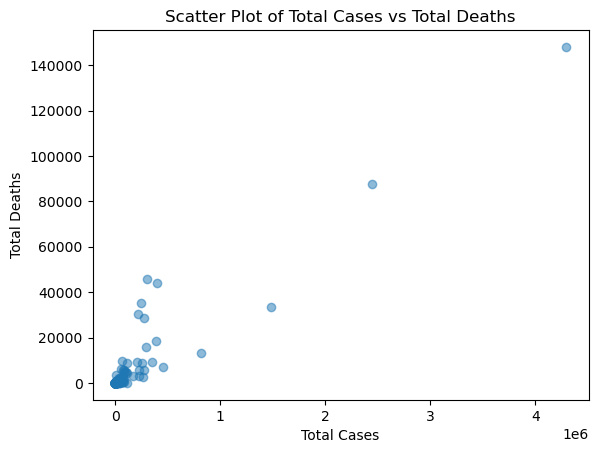

In [48]:
import matplotlib.pyplot as plt

plt.scatter(df['Total_cases'], df['Deaths'], alpha=0.5)
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('Scatter Plot of Total Cases vs Total Deaths')
plt.show()

# 23

In [49]:
df.to_csv('updated_dataset.csv', index=False)